In [1]:
image_folder = r"ParticipantScans\GAN\LeaveOut_008\Results\images"

mode = "after" #"before"

output_image_size = 256

In [2]:
import os

from local_vars import root_folder

data_fullpath = os.path.join(root_folder, image_folder)
images_folder = data_fullpath

if mode == "before":
    ultrasound_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('ultrasound.png')]
    segmentation_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('segmentation.png')]

    num_images = len(ultrasound_file_list)
    num_segmentations = len(segmentation_file_list)

    print( "Found {} image files".format(num_images))
    print( "Found {} segmentations".format(num_segmentations))
    
elif mode == "after":
    target_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('-targets.png')]
    output_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('-outputs.png')]
    input_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('-inputs.png')]

    num_target = len(target_file_list)
    num_output = len(output_file_list)
    num_input = len(input_file_list)

    print( "Found {} target image files".format(num_target))
    print( "Found {} output image files".format(num_output))
    print( "Found {} input segmentations".format(num_input))

Found 255 target image files
Found 255 output image files
Found 255 input segmentations


In [66]:
if mode == "after":
    print("SCROLL DOWN")
import cv2
import numpy as np

from ipywidgets import IntProgress
from IPython.display import display

input_intensity_scaling = 1/255.0

ultrasound_images_array = np.zeros([num_images, output_image_size, output_image_size, 1]).astype(np.float16)
segmentation_images_array = np.zeros([num_segmentations, output_image_size, output_image_size, 1]).astype(np.uint8)

f = IntProgress(min=0, max=num_images)
print("Reading files and saving them as numpy arrays...")
display(f)

for i in range(num_images):
    f.value = i
    current_us_file_name = ultrasound_file_list[i]
    current_us_file_fullname = os.path.join(images_folder, current_us_file_name)
    
    current_segmentation_file_name = segmentation_file_list[i]
    current_segmentation_file_fullname = os.path.join(images_folder, current_segmentation_file_name)
    
    ultrasound_target_image = cv2.imread(current_us_file_fullname, 0)
    segmentation = cv2.imread(current_segmentation_file_fullname, 0)

    if ultrasound_target_image is None:
        print("File not read: {}".format(current_us_file_fullname))
        break
    if segmentation is None:
        print("File not read: {}".format(current_segmentation_file_fullname))
        break
    if ultrasound_target_image.shape[0] != output_image_size or ultrasound_target_image.shape[1] != output_image_size:
        ultrasound_images_array[i,...,0] = cv2.resize(ultrasound_target_image, (output_image_size, output_image_size)).astype(np.float16) * input_intensity_scaling
        segmentation_images_array[i,...,0] = cv2.resize(segmentation, (output_image_size, output_image_size))
    else:
        ultrasound_images_array[i,...,0] = ultrasound_target_image.astype(np.float16) * input_intensity_scaling
        segmentation_images_array[i,...,0] = segmentation[...]

print("Images converted to numpy arrays")

Reading files and saving them as numpy arrays...


IntProgress(value=0, max=188)

File not read: C:\Data\ParticipantScans\GAN\LeaveOut_000\Results\images\left_kidney006_Browser01_0000_ultrasound.png
Images converted to numpy arrays


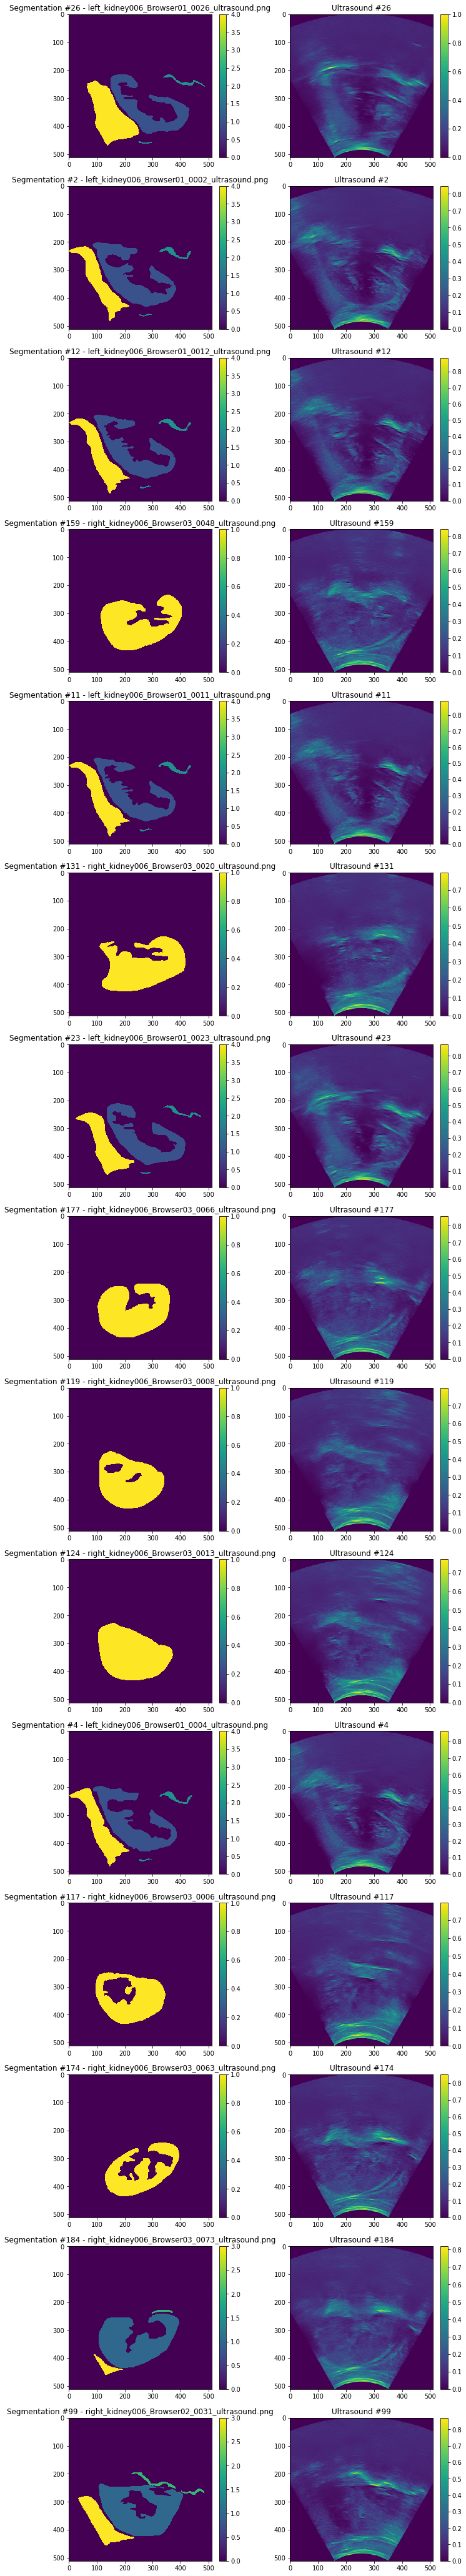

In [36]:
if mode == "after":
    print("SCROLL DOWN")
#view images

import matplotlib.pyplot as plt
from random import sample

np.set_printoptions(threshold=np.inf)

num_test = ultrasound_images_array.shape[0]
num_show = 15

indices = [i for i in range(num_test)]
sample_indices = sample(indices, num_show)


fig = plt.figure(figsize=(18, num_show*5))
for i in range(num_show):
    
    target = ultrasound_images_array[sample_indices[i], :, :, 0]    
    #print(target)
    
    a0 = fig.add_subplot(num_show,3,i*3+1)
    img0 = a0.imshow(segmentation_images_array[sample_indices[i], :, :, 0].astype(np.float32))
    a0.set_title("Segmentation #{} - {}".format(sample_indices[i], ultrasound_file_list[sample_indices[i]]))
    c0 = fig.colorbar(img0, fraction=0.046, pad=0.04)
    
    a1 = fig.add_subplot(num_show,3,i*3+2)
    img1 = a1.imshow(target.astype(np.float32))
    a1.set_title("Ultrasound #{}".format(sample_indices[i]))

    c1 = fig.colorbar(img1, fraction=0.046, pad=0.04)
    

In [3]:
import cv2
import numpy as np

from ipywidgets import IntProgress
from IPython.display import display

input_intensity_scaling = 1/255.0

target_images_array = np.zeros([num_target, output_image_size, output_image_size, 1]).astype(np.float16)
output_images_array = np.zeros([num_output, output_image_size, output_image_size, 1]).astype(np.float16)
input_images_array = np.zeros([num_input, output_image_size, output_image_size, 1]).astype(np.uint8)

f = IntProgress(min=0, max=num_target)
print("Reading files and saving them as numpy arrays...")
display(f)

for i in range(num_target):
    f.value = i
    
    target_file_name = target_file_list[i]
    target_file_fullname = os.path.join(images_folder, target_file_name)
    
    output_file_name = output_file_list[i]
    output_file_fullname = os.path.join(images_folder, output_file_name)
    
    input_file_name = input_file_list[i]
    input_file_fullname = os.path.join(images_folder, input_file_name)
    
    target_image = cv2.imread(target_file_fullname, 0)
    output_image = cv2.imread(output_file_fullname, 0)
    input_image = cv2.imread(input_file_fullname, 0)

    if target_image is None:
        print("File not read: {}".format(target_file_fullname))
        break
    if output_image is None:
        print("File not read: {}".format(output_file_fullname))
        break
    if input_image is None:
        print("File not read: {}".format(input_file_fullname))
        break
    if target_image.shape[0] != output_image_size or target_image.shape[1] != output_image_size:
        target_images_array[i,...,0] = cv2.resize(target_image, (output_image_size, output_image_size)).astype(np.float16) * input_intensity_scaling
        output_images_array[i,...,0] = cv2.resize(output_image, (output_image_size, output_image_size)).astype(np.float16) * input_intensity_scaling
        input_images_array[i,...,0] = cv2.resize(input_image, (output_image_size, output_image_size))
    else:
        target_images_array[i,...,0] = target_image.astype(np.float16) * input_intensity_scaling
        output_images_array[i,...,0] = output_image.astype(np.float16) * input_intensity_scaling
        input_images_array[i,...,0] = input_image[...]

print("Images converted to numpy arrays")

Reading files and saving them as numpy arrays...


IntProgress(value=0, max=255)

Images converted to numpy arrays


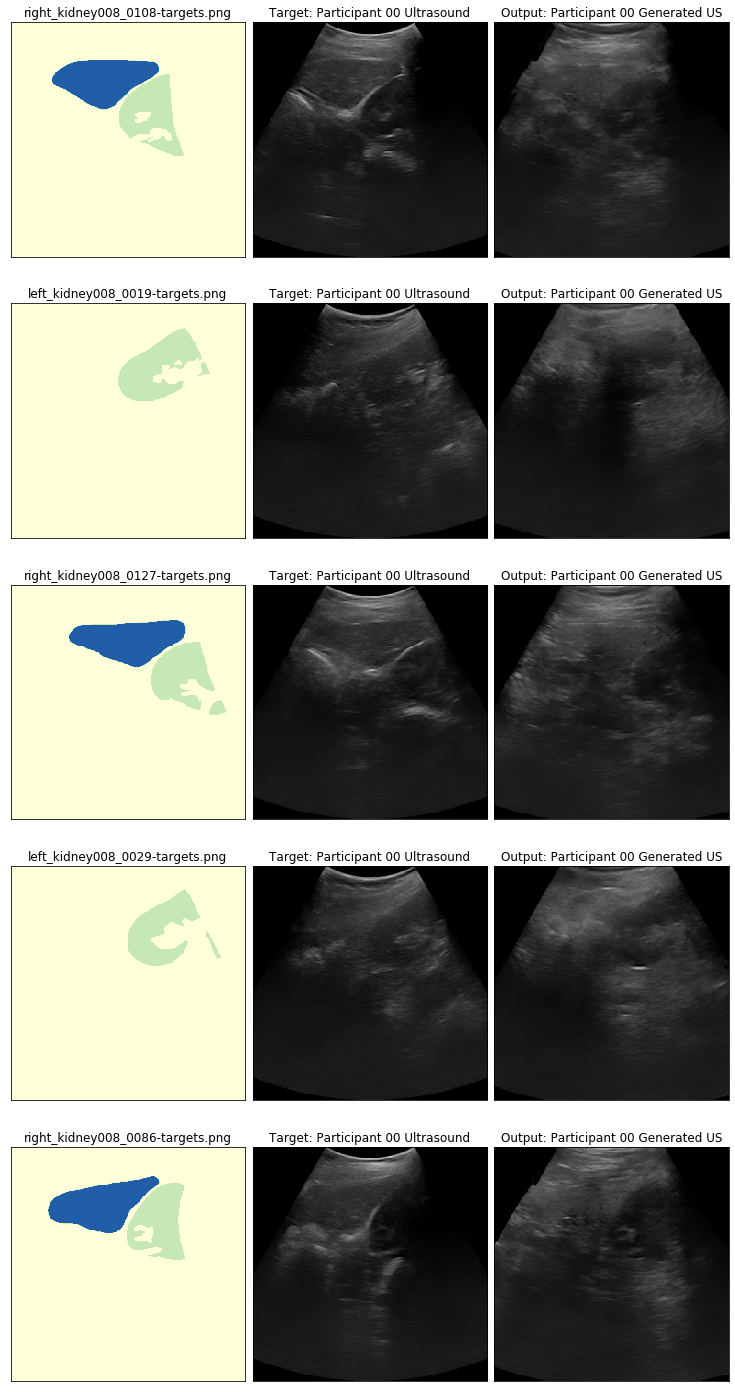

In [4]:
#view test results
%matplotlib inline

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from random import sample

np.set_printoptions(threshold=np.inf)

num_test = target_images_array.shape[0]
num_show = 5

indices = [i for i in range(num_test)]
sample_indices = sample(indices, num_show)

fig = plt.figure(figsize=(13, num_show*5))


for i in range(num_show):
    
    target = np.flipud(target_images_array[sample_indices[i], :, :, 0])
    prediction = np.flipud(output_images_array[sample_indices[i], :, :, 0])
    segment = np.flipud(input_images_array[sample_indices[i], :, :, 0])
    
    #print(target)
    
    
    a0 = fig.add_subplot(num_show,3,i*3+1, xticks=[], yticks=[])
    img0 = a0.imshow(segment.astype(np.float32), norm=mcolors.Normalize(vmin=0.,vmax=4.), cmap=plt.get_cmap('YlGnBu'))
    #a0.set_title("Input: Participant 00 Segmentation") # #{}".format(sample_indices[i]))
    a0.set_title("{}".format(target_file_list[sample_indices[i]]))
    #c0 = fig.colorbar(img0, fraction=0.046, pad=0.04)
    
    a1 = fig.add_subplot(num_show,3,i*3+2, xticks=[], yticks=[])
    img1 = a1.imshow(target.astype(np.float32), norm=mcolors.Normalize(vmin=0.,vmax=1.), cmap=plt.get_cmap('gray'))
    a1.set_title("Target: Participant 00 Ultrasound") # #{}".format(sample_indices[i]))
    #c1 = fig.colorbar(img1, fraction=0.046, pad=0.04)

    a2 = fig.add_subplot(num_show,3,i*3+3, xticks=[], yticks=[])
    img2 = a2.imshow(prediction.astype(np.float32), norm=mcolors.Normalize(vmin=0.,vmax=1.), cmap=plt.get_cmap('gray'))
    a2.set_title("Output: Participant 00 Generated US") # #{}".format(sample_indices[i]))
    #c2 = fig.colorbar(img2, fraction=0.046, pad=0.04)
    
    fig.subplots_adjust(wspace=0, hspace=None)
    